<h3><center>Predicting Future Visits of 140K Web Pages</center></h3>

#### Project Overview

This is the second Captone project for SpringBoard using the Kaggle dataset for a past competition: Web Traffic Time Series Forecasting. Detailed description of the dataset can be found here - https://www.kaggle.com/c/web-traffic-time-series-forecasting.

#### Background - Why the Prediction of Future Web Traffic
With the rapid rise of real time data sources, prediction of future trend and the detection of anomalies is becoming increasingly important. Accurate time series forecasting is critical for business operations for optimal resource allocation, budget planning, anomaly detection and tasks such as predicting customer growth, or understanding stock market trends. Specifically, there is growing interests in predicting the number of visitors to a Web site or page over the coming weeks or months.
#### Who might care? 
The digital marketing teams of the web sites, the site operation staff, and search engine companies would all be interested in what the page visits are going to be in the future, say, next week or month. The forecasting capability allows them to manage the resources beforehand and get alerts when there is something abnormal going on.

#### _Let's start!_

### Step One - Data Wrangling

#### Import the downloaded csv file.<br>

There are 2 csv files on the Kaggle website and the second one contains more recent dates in addition to the first csv file, so this study only need to import the second file.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data downloaded from the Kaggle website
train_df = pd.read_csv("/Users/YingShen/Desktop/Data_Science/SpringBorad/all/train_2.csv")
train_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


Number of rows:  145063 

Number of rows contain >1 null:  29979 



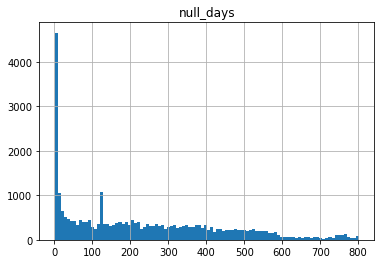

In [10]:
# Check number of missing values for each row (page) compared to total days

null_sums_array = train_df.isnull().sum(axis=1)
train_df['null_days'] = pd.DataFrame(null_sums_array)
null_rows=train_df[train_df['null_days']>0]

print("Number of rows: ", train_df.shape[0], "\n")
print("Number of rows contain >1 null: ", null_rows.shape[0], "\n")

null_hist = null_rows.hist(column='null_days', bins=100)

#### Dataset cleaning
 - Missing Values
  - Each row in the dataset corresponds to one Wiki page and there are 145063 pages. Each column is the page visit of the specific date from July 01, 2015 to September 10, 2017 (803 days in total).
  - As shown above, there are 29,979 pages with at least one null values among any of the study days and the highest frequencies of null days, per the histogram, are less than 50 days.
  - There are also many extreme page cases which have over 1 year of null days; these pages may be newly built during the study period, or may get a burst of visits due to sudden events.
  
  
 - According to the original online description of this dataset, null values may also represent zeros so will just replace all nulls with zeros for computation.

In [4]:
# fill the NaN values with 0 since the dataset does not distinguish between 0 and missing
df_filled=train_df.fillna(0)

# The original file runs very low so here I will transfer floats to integers to save some space
days_df=df_filled.iloc[:,1:].astype('int64') 
page_df=df_filled.iloc[:,0]
days_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 803 entries, 2015-07-01 to 2017-09-10
dtypes: int64(803)
memory usage: 888.7 MB


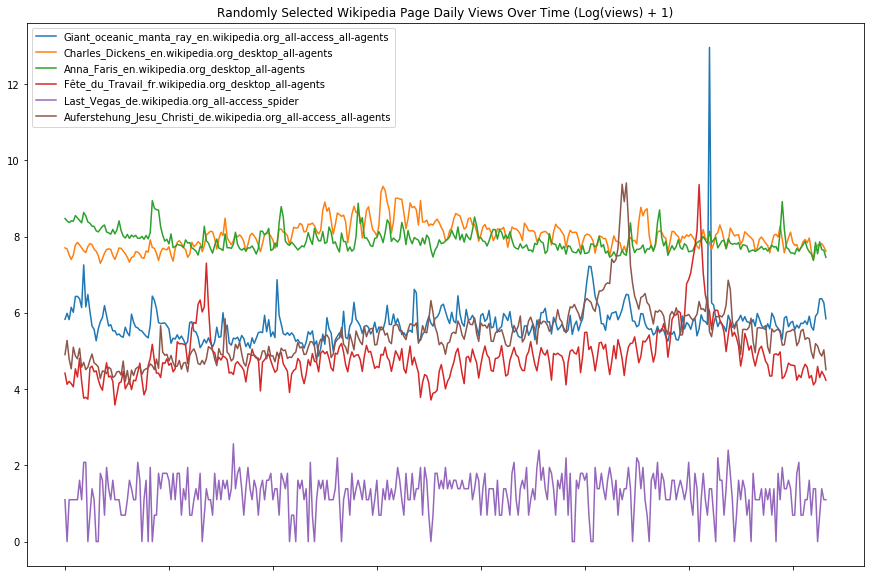

In [10]:
# Randomly select time series of web traffic for one year period
# Page views will be log transformed for easier observation

def plot_random_series(df, n_series):
    
    sample = df.sample(n_series, random_state=25)
    page_labels = sample['Page'].tolist()
    series_samples = sample.loc[:,"2015-07-01":"2016-07-01"]
    
    plt.figure(figsize=(15,10))
    
    for i in range(series_samples.shape[0]):
        np.log1p(pd.Series(series_samples.iloc[i]).astype(np.float64)).plot(linewidth=1.5)
    
    plt.title('Randomly Selected Wikipedia Page Daily Views Over Time (Log(views) + 1)')
    plt.legend(page_labels)
    
plot_random_series(df_filled, 6)

 #### _Observation 1_
 There are large variations between each page. Some page (e.g., the blue one) has spikes and some page (e.g., the purple one) has low volume and quite constant trend.

In [14]:
# save the fast files
# train_df.to_csv('/Users/YingShen/Desktop/Data_Science/SpringBorad/all/train.csv')
# page_df.to_csv('/Users/YingShen/Desktop/Data_Science/SpringBorad/all/page.csv')
# days_df.to_csv('/Users/YingShen/Desktop/Data_Science/SpringBorad/all/days.csv')
# page_df=pd.read_csv('/Users/YingShen/Desktop/Data_Science/SpringBorad/all/page.csv',header=None)
# days_df=pd.read_csv('/Users/YingShen/Desktop/Data_Science/SpringBorad/all/days.csv')

### Step Two - Exploratory Data Analysis

#####  1.  Feature Extraction
 - There are useful pieces of information from the Page columne; each string has a fixed format containing representations of 
  - languages (e.g, English, Japanese), 
  - sites (e.g., Wikipedia home page, Wikimedia), 
  - access (e.g., all-access, desktops) and 
  - agents (e.g., all-agents, spiders).
 - Next I will extract these strings and create new features for each page

In [12]:
# Create the language feature from page

new_df=pd.concat([days_df,page_df],axis=1).drop(columns=["null_days"])

import re
def extract_lang(page):
    lang = re.search('[a-z][a-z].wikipedia.org',page)
    if  lang:
        return  lang[0][0:2]
    else: 
        return 'na'
new_df['lang'] = new_df['Page'].apply(extract_lang)
new_df['lang'].value_counts()

en    24108
ja    20431
de    18547
na    17855
fr    17802
zh    17229
ru    15022
es    14069
Name: lang, dtype: int64

In [25]:
# Create the site feature from page

def get_site(page):
    string=page.split(sep="_")[-3]
    site=string.split(sep=".")[-2]
    return site

new_df["Site"]=new_df["Page"].apply(get_site)
new_df["Site"].value_counts() # checked that wikimedia and mediawiki are different sites

wikipedia    127208
wikimedia     10555
mediawiki      7300
Name: Site, dtype: int64

In [26]:
# Create the access feature from page

def get_access(page):
    access=page.split(sep="_")[-2]
    return access

new_df["Access"]=new_df["Page"].apply(get_access)
new_df["Access"].value_counts()

all-access    74315
mobile-web    35939
desktop       34809
Name: Access, dtype: int64

In [27]:
# Create the agent feature from page

def get_agent(page):
    agent=page.split(sep="_")[-1]
    return agent

new_df["Agent"]=new_df["Page"].apply(get_agent)
new_df["Agent"].value_counts()

all-agents    110150
spider         34913
Name: Agent, dtype: int64

##### 2.  Check time series plots for different languages
 Just to check one of the global features and see the differences between their behavior

In [79]:
# Create a dataframe grouped by language and with mean of daily visits
mean_by_lang=new_df.groupby('lang').mean()
mean_by_lang

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
lang,,,,,,,,,,,,,,,,,,,,,
de,813.126436,796.675473,766.526608,690.022591,805.578692,910.216639,878.894323,885.695261,852.317949,792.818461,...,721.688521,606.580148,666.840028,674.860517,656.370518,668.905160,769.632555,631.594867,588.483043,658.244837
en,4993.841256,4940.004563,4693.693670,4865.180728,5075.317198,5449.645222,5100.504438,4782.959806,4931.571636,4866.276506,...,3254.795089,3466.094284,4086.798366,4130.051311,3865.212046,3957.290733,4059.171312,3087.856189,2987.322051,4980.586320
es,1144.640131,1096.351837,983.084370,923.027365,1011.131850,1156.782216,1124.967588,1098.436065,1066.390788,980.912574,...,1008.643187,824.264411,1013.196105,1213.957993,1285.192551,1239.849314,1195.254673,1024.946691,828.821238,963.323335
fr,1754.230817,497.785530,478.097068,530.365858,503.218234,526.308729,511.200764,509.235367,499.197450,472.618526,...,500.316875,477.880856,508.463656,459.590158,448.931637,528.095607,519.548871,449.844737,474.805865,512.400067
ja,588.779600,675.630610,605.525035,769.695561,745.722578,641.588371,620.803485,617.729675,601.160736,622.614409,...,643.733004,623.512359,648.125300,581.775439,559.690519,576.609368,638.995693,573.576183,616.277519,688.555430
na,105.624083,113.172277,102.887651,95.913750,101.579782,113.905349,120.516774,118.377989,106.722543,106.215738,...,314.819602,179.327359,231.491627,209.822067,182.230076,496.028507,880.594119,156.313918,170.099748,145.735256
ru,652.488683,648.446678,599.473372,565.740248,642.946013,647.309479,632.220011,629.061643,646.232060,771.902277,...,636.409599,632.005858,654.328918,630.095859,765.387365,997.838703,697.494275,601.979031,613.365464,671.571029
zh,316.687388,247.815834,256.976319,247.733066,264.652621,267.782576,269.058622,296.261013,281.543038,312.194440,...,278.148413,303.803123,321.158222,295.187126,297.814963,290.366823,302.606245,291.924952,305.059841,317.698009


 #### 2.1_Autocorrelation_
 Interested to see if any seasonality can be identified.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


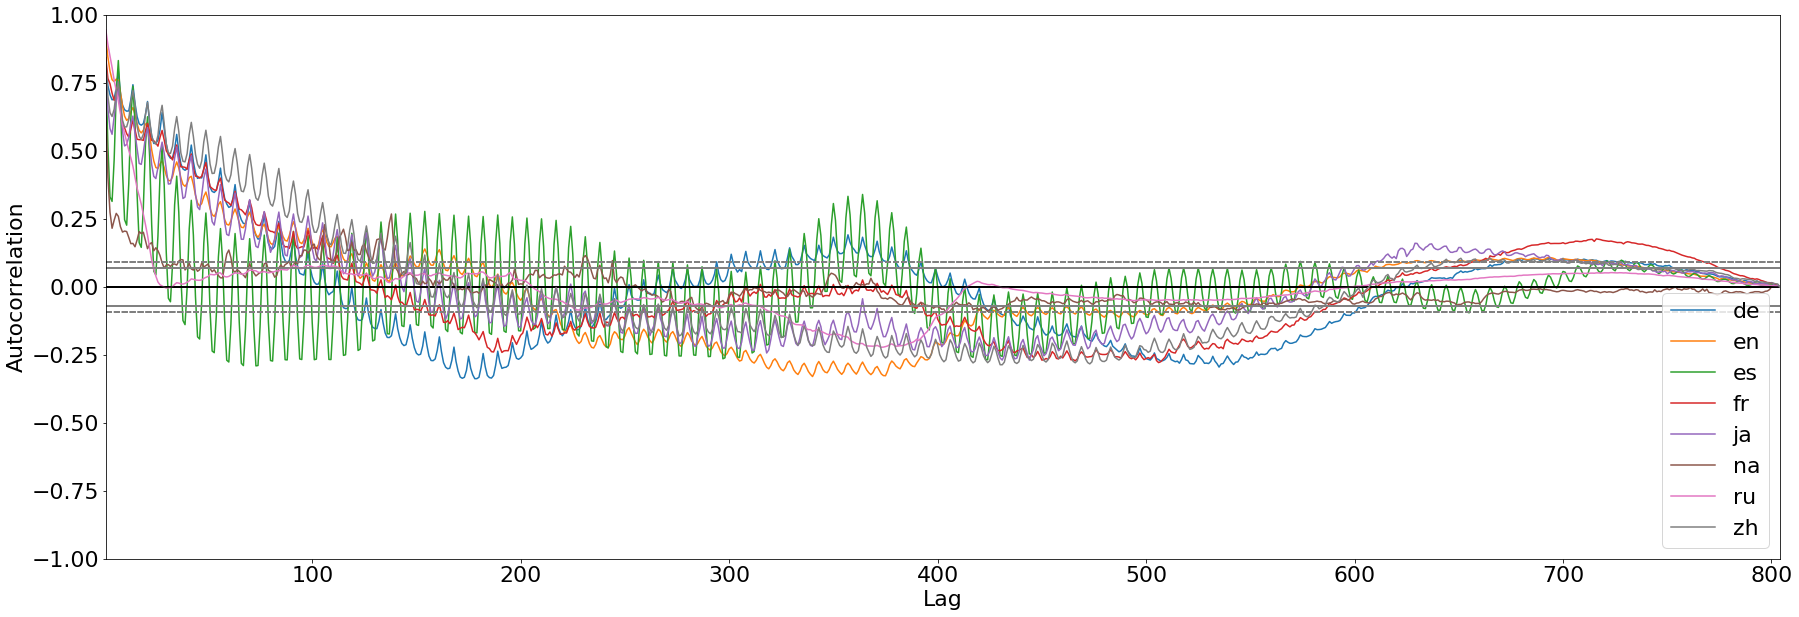

In [80]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 22})

for i in mean_by_lang.index:
    autocorrelation_plot(mean_by_lang.loc[i],label=i)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 100)

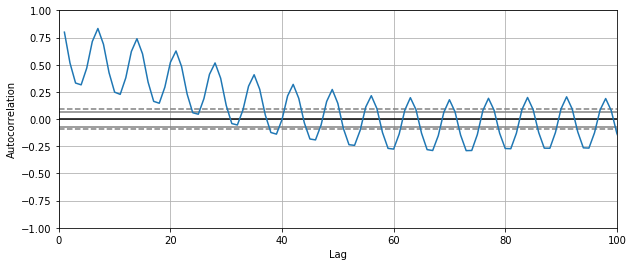

In [91]:
# Zoom in to see only 100 days for English only pages
plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 10})
autocorrelation_plot(mean_by_lang.loc['es'])
plt.xlim(0,100)

 #### 2.2_what about partial autocorrelation_
 It is helpful to identify lags for statistical models such as ARIMA.

de


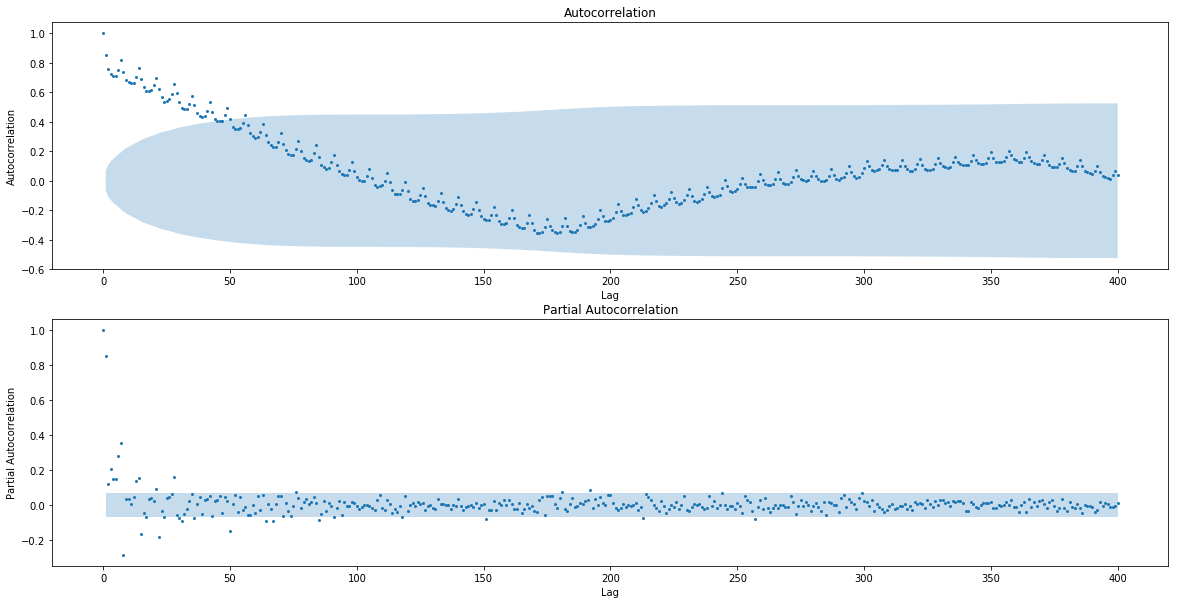

en


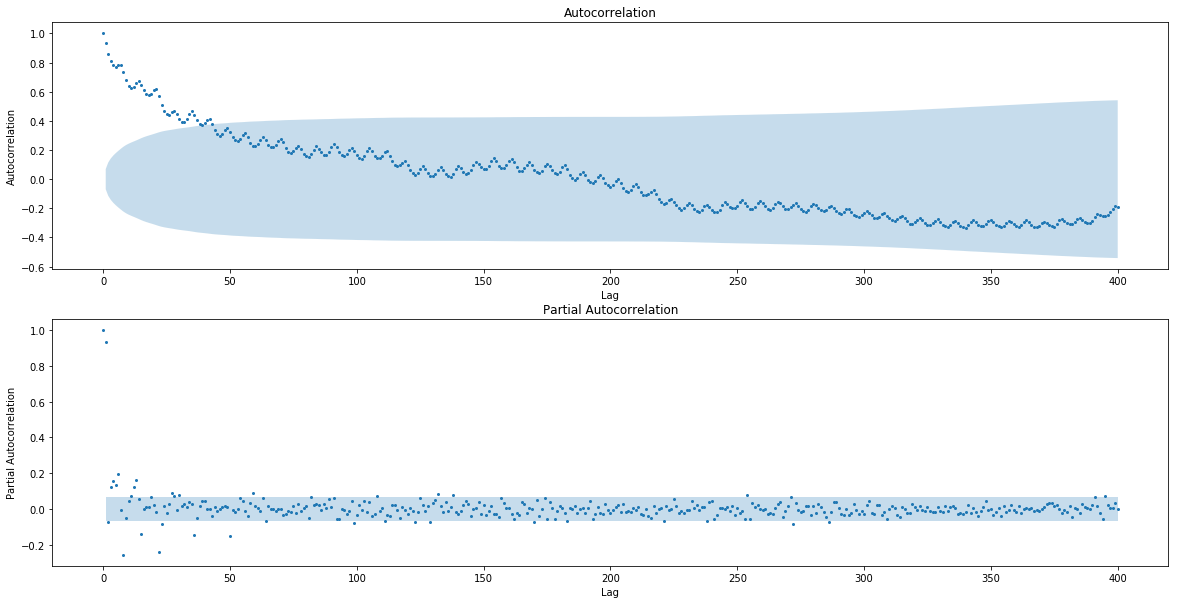

es


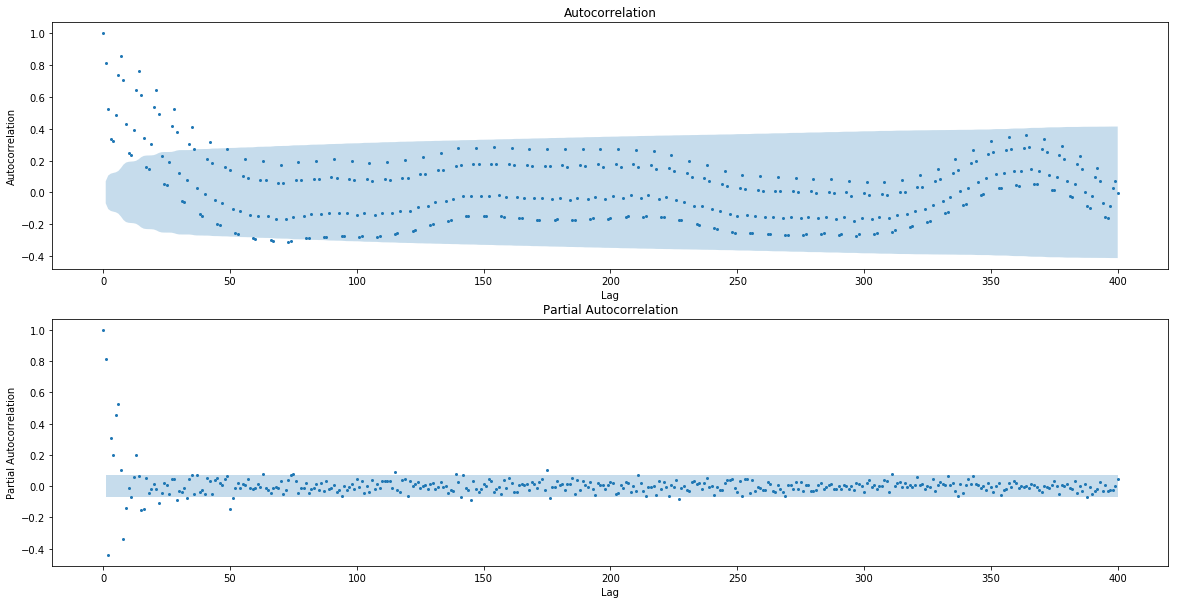

fr


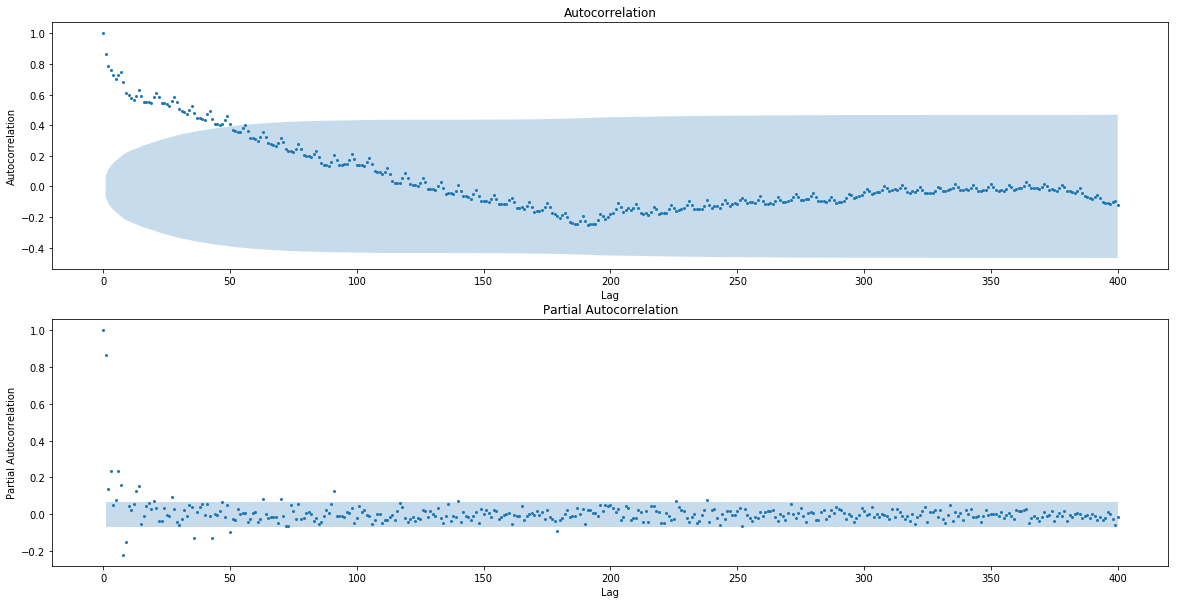

ja


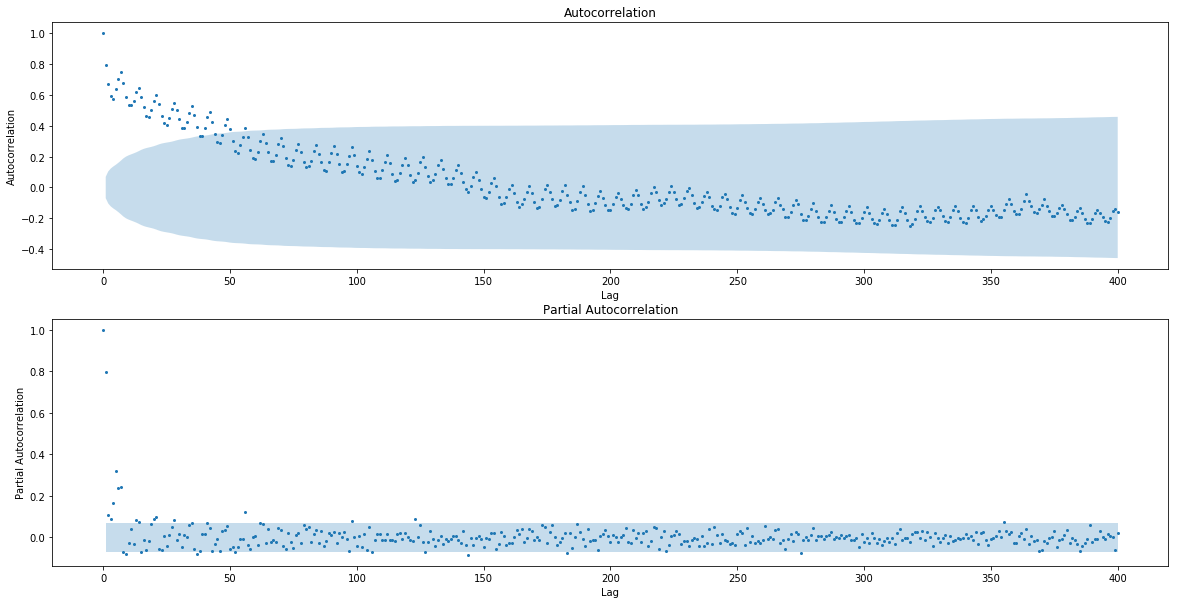

na


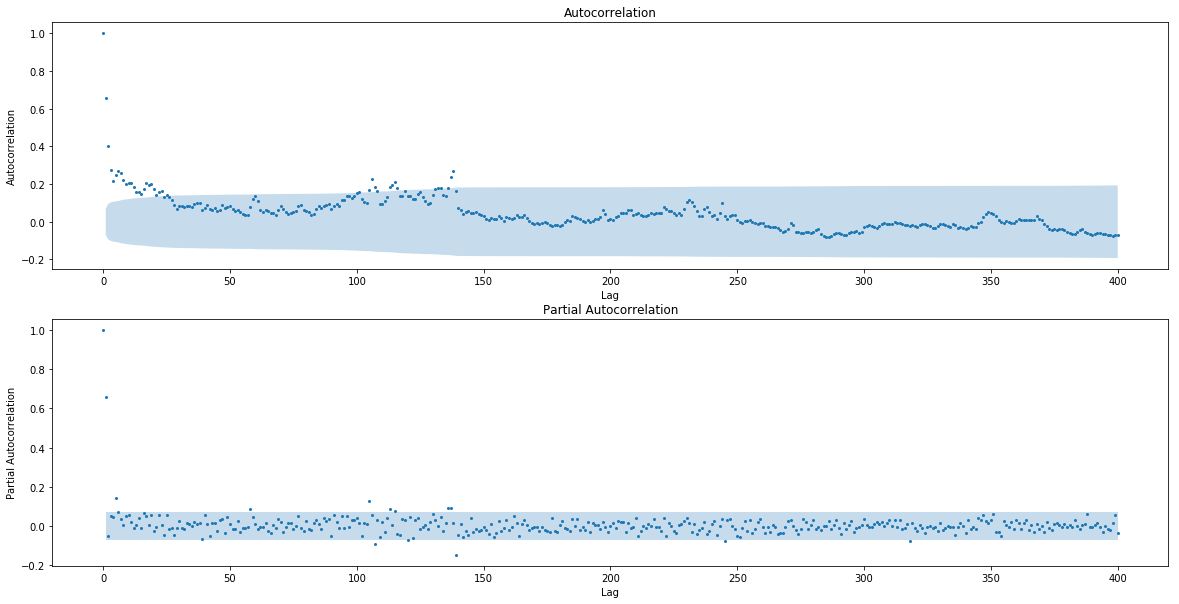

ru


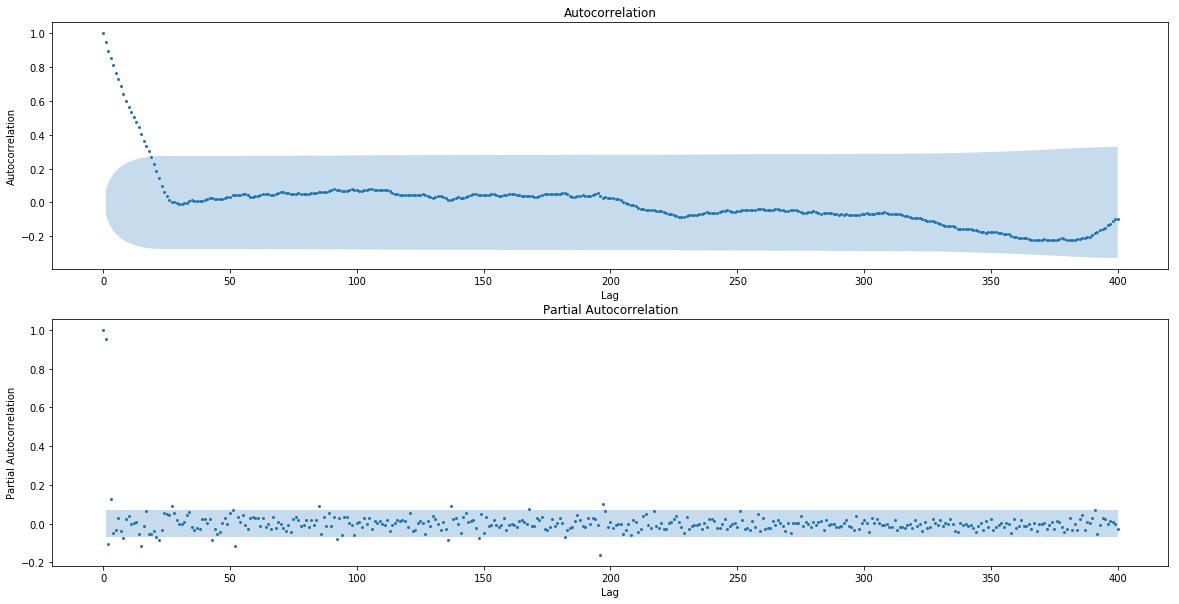

zh


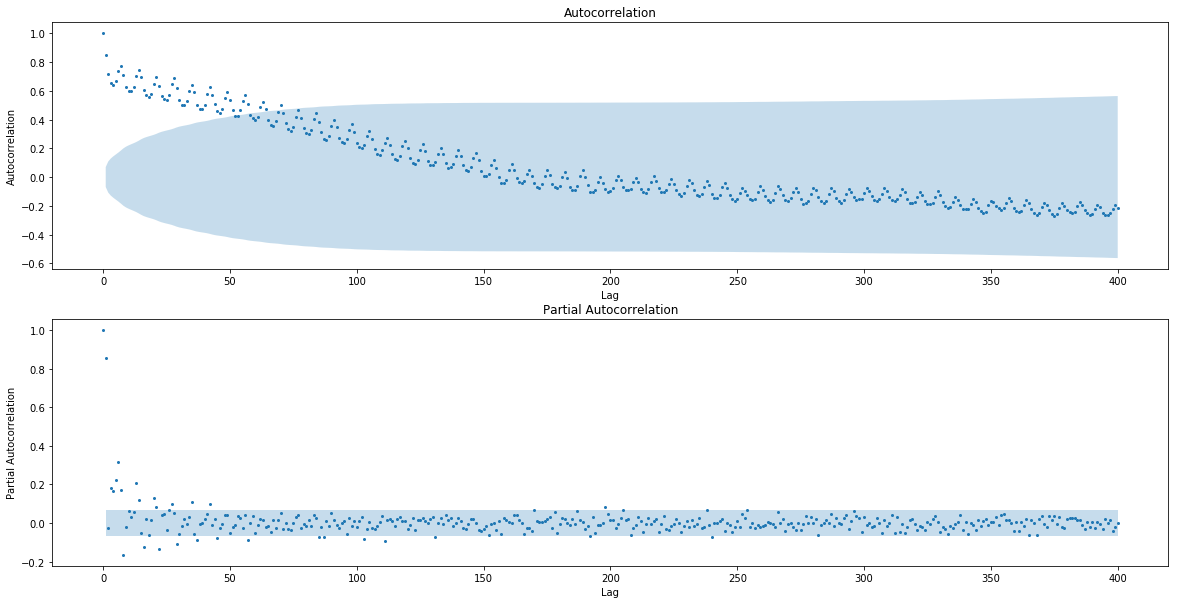

In [167]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

for lang in list(mean_by_lang.index):
    fig = plt.figure(1,figsize=[20,10])
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    data = mean_by_lang.loc[lang]

    x = [x for x in range(len(pac))]
    plot_acf(data,ax=ax1,lags=400,use_vlines=False,markersize=2)
    plot_pacf(data,ax=ax2,lags=400,use_vlines=False,markersize=2)

    
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')

    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')

    print(lang)
    plt.show()

 #### _Observation 2_
 The area in blue of the autocorrelation and partial autocorrelation graphs is the significant bound for important lags. Past 7 days would be useful and weekly trend is obvious.

### Step Three - Predictions

 ####  _Challenge_
#### There are 140K+ time series here and the goal is to predict the future 2 months visits for each page.
 - Statistical models like ARIMA might not be appropriate for this kind of task since each page would have differece in the parameters of ARIMA model (number of lags for autoregression model, number of differences, and number of lags for moving average model); and it would be hard to test if the (weak) stationarity assumption is met for the time series of each page.
 - It would be interested to incorporate the extracted features since high chance is that there is global trend among pages with the same feature.
 
 

#### 3.1 Baseline Predictions with Mean/Median of Past 7 Days
It is always nice to try a simple baseline model first and build/compare fancier models based on the baseline model. Especially for the time series predictions with large amount of data, if we melt the data into matrix as [# of obs, # of features], then there would be __803 multiply 145,063 = 116,485,589 (116 million)__ cells before extending global features already. I will use other softwares or cloud services to deal with this amount of data since my mac is not capable of handling such huge amount of data.

In [15]:
visits_df=days_df.drop(columns=["null_days"])

In [16]:
test=visits_df.iloc[:,-62:]
train=visits_df.iloc[:,1:-62]
train.head()

,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,...,2017-07-01,2017-07-02,2017-07-03,2017-07-04,2017-07-05,2017-07-06,2017-07-07,2017-07-08,2017-07-09,2017-07-10
0,11,5,13,14,9,9,22,26,24,19,...,23,24,26,15,14,15,19,29,22,25
1,14,15,18,11,13,22,11,10,4,41,...,15,26,16,23,19,16,816,20,76,24
2,0,1,1,0,4,0,3,4,4,1,...,1,1,7,1,1,1,10,1,2,6
3,13,10,94,4,26,14,9,11,16,16,...,7,19,16,10,17,15,22,6,6,18
4,13,10,94,4,26,14,9,11,16,16,...,12,16,6,16,18,12,14,11,16,15


In [53]:
def recur_mean(df,n): # df with prediction for 07-11-2017 to 09-10-2017
    ''' return mean of past n days, with new prediction included '''
    for i in range(1,63):
        df[i]=df.iloc[:,-n:].mean(axis=1)  
    pred=df.iloc[:,-62:]
    cols=list(range(1,62))
    df.drop(columns=cols,inplace=True)
    return pred
        
def recur_median(df,n): # df with prediction for 07-11-2017 to 09-10-2017
    ''' return median of past n days, with new prediction included '''
    for i in range(1,63):
        df[i]=df.iloc[:,-n:].mean(axis=1)
    pred=df.iloc[:,-62:]
    cols=list(range(1,62))
    df.drop(columns=cols,inplace=True)
    return pred

def smape(true, pred):
    summ = true.add(pred)
    diff = np.abs(true.subtract(pred))
    df_smape = np.where(summ == 0, 0, diff / summ)
    df_smape = df_smape*200/true.shape[1]
    smape = df_smape.sum()/true.shape[0]
    return smape 

def baseline_pipe(past_days, train, test, mean=False, median=False):
    if mean==True:
        pred=recur_mean(train,past_days)
        
    elif median==True:
        pred=recur_median(train,past_days)
        
    return smape(test,pred)

In [11]:
test_2=test.rename(columns={x:y for x,y in zip(test.columns,range(1,len(test.columns)+1))})

In [54]:
baseline_pipe(7, train, test_2, mean=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


43.98080555908572

In [55]:
baseline_pipe(7, train, test_2, median=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


44.08730995685797

#### _Observation 3_
It is surprising to see that the score is quite small as compared to the 1st rank score (around 39) of the original Kaggle competition. This means that past 7 days is very useful to predict most pages.

  ##### _One thought here: One reason may be that there are remarkable number of pages that have null values or constant trend at the end (just before the prediction start)._

*To be continued with Capstone_2.2* <br>
<span style="color:blue"> In order to apply KNN and neural network, in the next part, AWS service will be used. </span>